In [1]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 39s 0us/step


### EDA

In [3]:
# Train data shape
x_train.shape

(50000, 32, 32, 3)

In [4]:
# visualize single image
single_image = x_train[0]
single_image   # 28*28 pixel means: 28 rows and 28 cols matrix

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

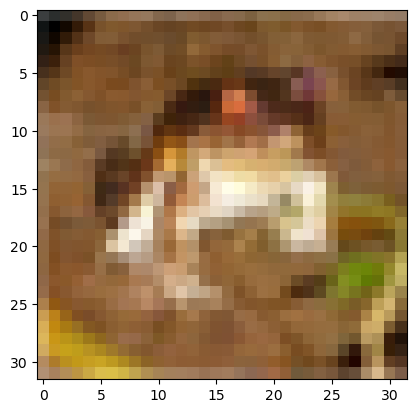

In [5]:
plt.imshow(single_image)

## Preprocessing

In [6]:
# Labels

y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [8]:
# Keras has simple way to do One-hot Encoding
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test,10)

y_cat_train = to_categorical(y_train,10)

# Output should be Train (60000,10) and Test (10000,10)

print("Train label sizes: ", y_cat_train.shape)
print("Test label sizes: ", y_cat_test.shape)

Train label sizes:  (50000, 10)
Test label sizes:  (10000, 10)


In [10]:
#Should Normalize X data

#value = value/255

In [11]:
single_image.max()    # We bind values from 0 to 1

255

In [12]:
#Scaled
x_train = x_train/255
y_train = y_train/255

In [13]:
x_train[0].max()   # previous it was 255 and now 1. That's grt !!!!

1.0

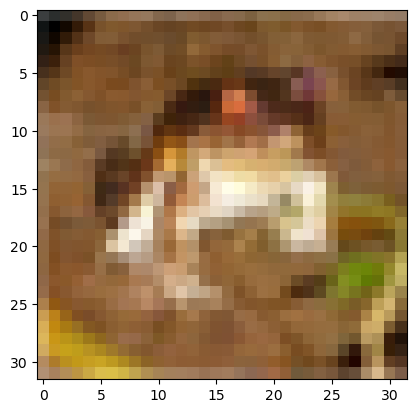

In [15]:
image = x_train[0]
plt.imshow(image)

### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

### Model Creation

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 by 3 to 3072 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES : Multi class classification
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=5)

## Train the Model

model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5120 - accuracy: 0.4560 - val_loss: 237.5479 - val_accuracy: 0.4010
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1762 - accuracy: 0.5875 - val_loss: 226.4905 - val_accuracy: 0.4215
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0175 - accuracy: 0.6435 - val_loss: 197.4878 - val_accuracy: 0.4807
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9058 - accuracy: 0.6852 - val_loss: 232.1525 - val_accuracy: 0.4628
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8157 - accuracy: 0.7151 - val_loss: 244.1514 - val_accuracy: 0.4757
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7417 - accuracy: 0.7412 - val_loss: 202.6458 - val_accuracy: 0.5212
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6690 - accuracy: 0.7638 - val_lo

In [30]:
#evaluate Model
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.511962,0.45600,237.547897,0.4010
1,1.176239,0.58752,226.490494,0.4215
2,1.017537,0.64348,197.487762,0.4807
3,0.905832,0.68518,232.152481,0.4628
4,0.815678,0.71508,244.151398,0.4757
5,0.741743,0.74116,202.645828,0.5212
6,0.669043,0.76380,227.263123,0.5311
7,0.600653,0.78790,281.667419,0.4893


<AxesSubplot:>

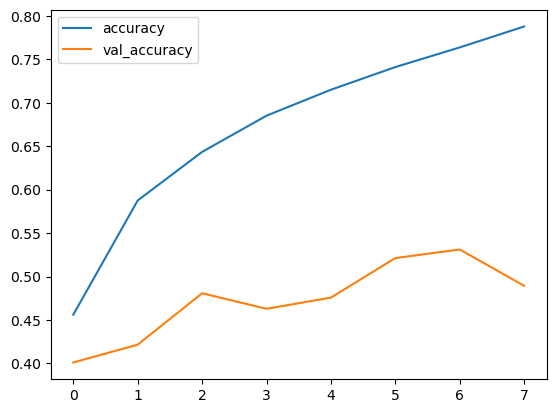

In [31]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

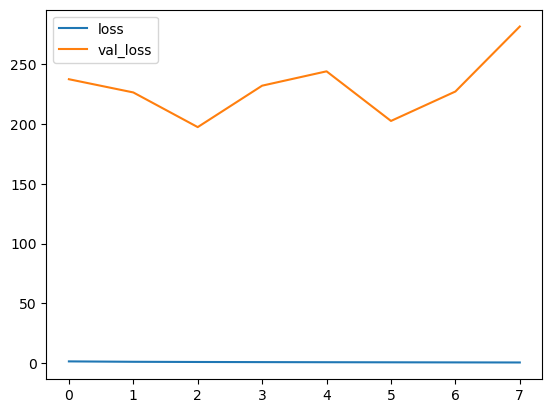

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[281.66741943359375, 0.489300012588501]


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 2s 5ms/step


In [35]:
predictions.shape

(10000,)

In [36]:
y_test.shape

(10000, 1)

In [37]:
y_cat_test.shape

(10000, 10)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.40      0.82      0.54      1000
           1       0.60      0.70      0.64      1000
           2       0.69      0.17      0.27      1000
           3       0.36      0.31      0.33      1000
           4       0.62      0.14      0.23      1000
           5       0.43      0.53      0.47      1000
           6       0.86      0.28      0.43      1000
           7       0.50      0.70      0.59      1000
           8       0.63      0.50      0.56      1000
           9       0.44      0.73      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.55      0.49      0.46     10000
weighted avg       0.55      0.49      0.46     10000



In [39]:
confusion_matrix(y_test,predictions)

array([[819,  28,   3,   9,   3,  11,   0,  35,  45,  47],
       [ 81, 704,   0,   8,   1,   6,   0,  15,  35, 150],
       [262,  44, 172, 106,  19, 171,  14,  89,  38,  85],
       [128,  48,  13, 310,  18, 218,  11,  98,  41, 115],
       [157,  53,  28, 133, 144, 133,  13, 221,  27,  91],
       [ 89,  20,  17, 140,  12, 528,   6,  94,  19,  75],
       [110,  84,   9, 105,  12,  87, 285,  75,  49, 184],
       [ 59,  16,   6,  37,  14,  64,   1, 704,  18,  81],
       [273,  80,   2,  11,   5,  10,   0,  30, 501,  88],
       [ 83, 106,   1,   8,   4,   9,   1,  34,  28, 726]], dtype=int64)

<AxesSubplot:>

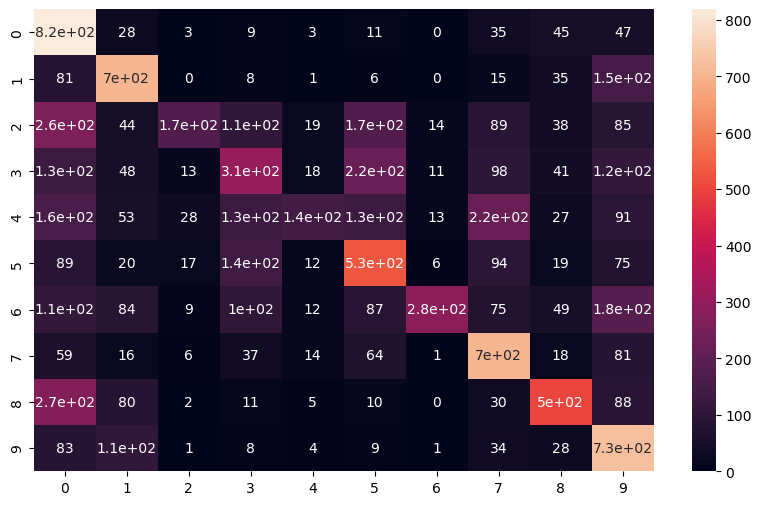

In [40]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)